<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Project_003_dacon_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import dot, mean
from numpy.linalg import norm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score, roc_auc_score

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Project_003/train.csv')
val = pd.read_csv('/content/drive/MyDrive/Project_003/val.csv')
test = pd.read_csv('/content/drive/MyDrive/Project_003/test.csv')

In [3]:
columns = []

for i in range(1, 30 + 1) :
  columns.append('V{}'.format(i))

print(columns)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30']


In [4]:
outliers_fraction = 30 / 28462
print(outliers_fraction)

0.0010540369615627855


In [5]:
val_abnor = val[val['Class'] == 1][columns]
abnor_vector = val_abnor.mean().to_numpy()

def cos_sim(a, b) :
  return dot(a, b) / (norm(a) * norm(b))

def cosfeature(data) :
  datacs = []
  for i in data[columns].to_numpy() :
    datacs.append(cos_sim(abnor_vector, i))
  data['V31'] = datacs

cosfeature(train)
cosfeature(val)
cosfeature(test)

In [6]:
def pearson_similarity(a, b) :
  return dot((a - mean(a)), (b - mean(b))) / ((norm(a - mean(a))) * (norm(b - mean(b))))

def pearsonfeature(data) :
  datacs = []
  for i in data[columns].to_numpy() :
    datacs.append(pearson_similarity(abnor_vector, i))
  data['V32'] = datacs

pearsonfeature(train)
pearsonfeature(val)
pearsonfeature(test)

In [7]:
print(train.columns)
print(len(train.columns))

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32'],
      dtype='object')
33


In [8]:
fit_columns = ['V9', 'V11', 'V12', 'V17', 'V31', 'V32']

In [9]:
train_x = train[fit_columns]
val_x = val[fit_columns]
test_x = test[fit_columns]

val_y = val['Class']

train_x.head()

,V9,V11,V12,V17,V31,V32
0,-1.514654,0.624501,0.066084,1.109969,-0.026012,0.024835
1,-1.387024,-0.226487,0.178228,-0.684093,-0.090965,-0.136051
2,-0.568671,1.341262,0.359894,-0.058133,-0.045050,0.001014
3,0.615375,-0.619468,0.291474,-1.222127,-0.108131,-0.144766
4,-0.392048,-0.705117,-0.110452,-0.499768,-0.059377,0.015230


In [10]:
ss = StandardScaler()

train_ss = ss.fit_transform(train_x)
val_ss = ss.fit_transform(val_x)
test_ss = ss.fit_transform(test_x)

train_pd = pd.DataFrame(train_ss)
train_pd.columns = fit_columns
train_pd.head()

,V9,V11,V12,V17,V31,V32
0,-1.380804,0.617126,0.063600,1.368591,-0.057081,0.214476
1,-1.264291,-0.221548,0.178380,-0.850277,-0.719418,-1.023211
2,-0.517216,1.323514,0.364316,-0.076100,-0.251215,0.031223
3,0.563699,-0.608841,0.294288,-1.515709,-0.894453,-1.090256
4,-0.355977,-0.693250,-0.117085,-0.622307,-0.397306,0.140587


In [68]:
model_lof = LocalOutlierFactor(n_neighbors = 35, contamination = outliers_fraction)
model_lof.fit(train_ss)
val_pred = model_lof.fit_predict(val_ss)

val_pred = np.where(val_pred == 1, 0, val_pred)
val_pred = np.where(val_pred == -1, 1, val_pred)

val_f1 = f1_score(val_y, val_pred, average = 'macro')
val_auc = roc_auc_score(val_y, val_pred)

print('f1_score : {}, auc_score : {}'.format(val_f1, val_auc))

f1_score : 0.9165787375726882, auc_score : 0.9165787375726882


In [69]:
val_pred_color = []

for i in range(len(val_ss)) :
  if val_pred[i] == 1 :
    val_pred_color.append('r')
  else :
    val_pred_color.append('b')

print(len(val_pred_color))
print(val_pred_color.count('r'))

28462
30


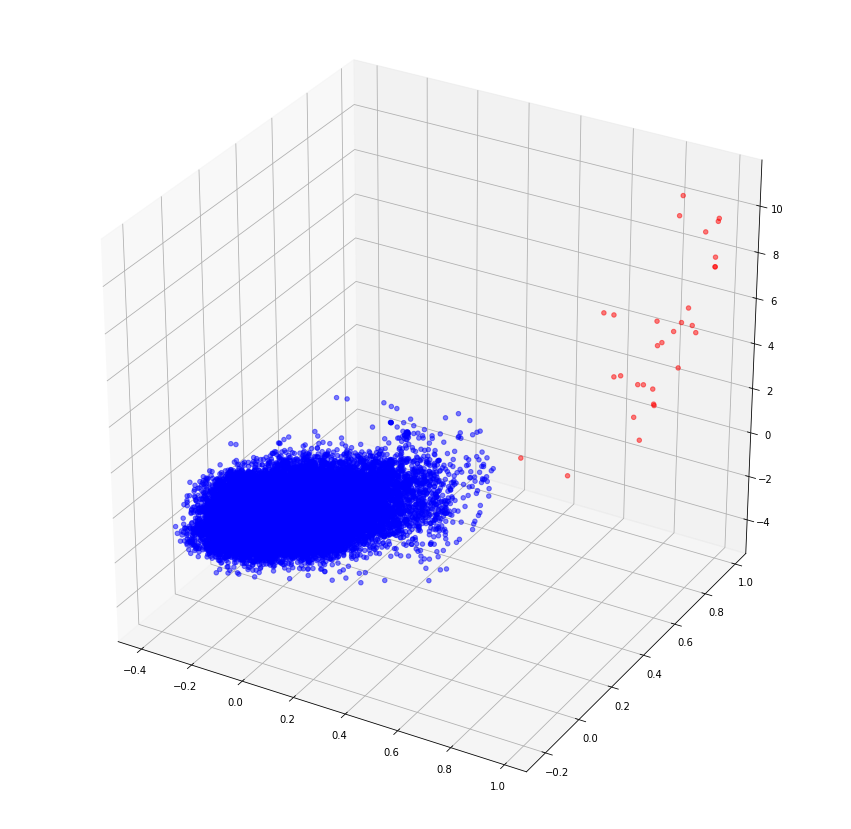

In [70]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(val['V32'], val['V31'], val['V11'], alpha = 0.5, c = val_pred_color)
plt.show()

In [71]:
train_pred = model_lof.fit_predict(train_ss)

train_pred = np.where(train_pred == 1, 0, train_pred)
train_pred = np.where(train_pred == -1, 1, train_pred)

In [72]:
train_pred_color = []

for i in range(len(train_ss)) :
  if train_pred[i] == 1 :
    train_pred_color.append('r')
  else :
    train_pred_color.append('b')

print(len(train_pred_color))
print(train_pred_color.count('r'))

113842
120


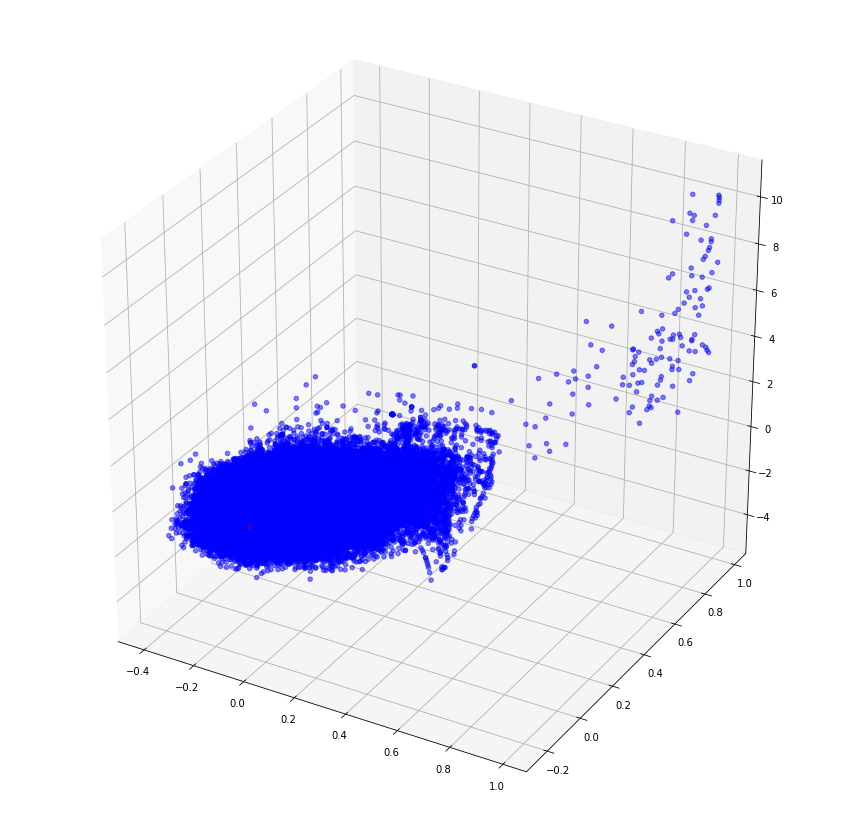

In [73]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(train['V32'], train['V31'], train['V11'], alpha = 0.5, c = train_pred_color)
plt.show()

In [74]:
test_pred = model_lof.fit_predict(test_ss)

test_pred = np.where(test_pred == 1, 0, test_pred)
test_pred = np.where(test_pred == -1, 1, test_pred)

In [75]:
test_pred_color = []

for i in range(len(test_ss)) :
  if test_pred[i] == 1 :
    test_pred_color.append('r')
  else :
    test_pred_color.append('b')

print(len(test_pred_color))
print(test_pred_color.count('r'))

142503
151


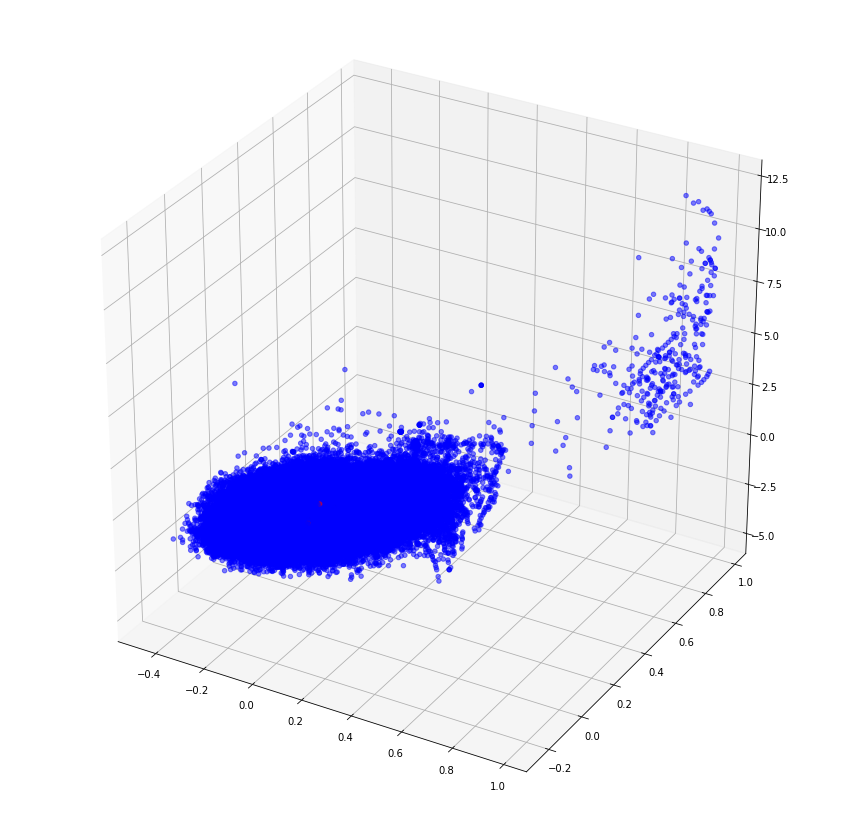

In [76]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(test['V32'], test['V31'], test['V11'], alpha = 0.5, c = test_pred_color)
plt.show()

In [77]:
svmlinear = pd.read_csv('/content/drive/MyDrive/Project_003/Robust4_to_svm_classification.csv')

In [78]:
svm_result = svmlinear['Class'].to_numpy()
print(svm_result[ : 5])
print(len(svm_result))

test_f1 = f1_score(svm_result, test_pred, average = 'macro')
test_auc = roc_auc_score(svm_result, test_pred)

print('f1_score : {}, auc_score : {}'.format(test_f1, test_auc))

[0 0 0 0 0]
142503
f1_score : 0.4991828945564963, auc_score : 0.49946901659059423
